In [155]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv

#-------------------Inputs-------------------------------------------------------------
script = "Longitudinal Analysis_6 Paddler.ipynb"
input_file = "Station Information.csv"
outerHull_file = "Outer Hull.csv" # Will be used for hydrostatic force and waterline calculation
DLF = cv.DLF # Dead Load Factor
LLF = 1.5 # Live Load Factor
pad_weights = cv.pad_weights # Weight of paddlers (kg)
water_den = cv.water_density # Density of water = 1000 kg/m^3
#--------------------------------------------------------------------------------------
# Acquire the waterline from grasshopper
grasshopper = cv.grasshopper[3] # [mm]

pad1_po =  961 # Position of first paddler with respect to left end of canoe (mm)
pad2_po = 1795 # Position of second paddler with respect to left end of canoe (mm)
pad3_po = 2495 # Position of third paddler with respect to left end of canoe (mm)
pad4_po = 3256 # Position of fourth paddler with respect to left end of canoe (mm)
pad5_po = 3983 # Position of fifth paddler with respect to left end of canoe (mm)
pad6_po = 4763 # Position of sixth paddler with respect to left end of canoe (mm)
# Choose between pad_weights
pad_first = pad_weights[1]
pad_second = pad_weights[1]
pad_third = pad_weights[1]
pad_fourth = pad_weights[1]
pad_fifth = pad_weights[1]
pad_sixth = pad_weights[1]

pad1 = pad_first*LLF
pad2 = pad_second*LLF
pad3 = pad_third*LLF
pad4 = pad_fourth*LLF
pad5 = pad_fifth*LLF
pad6 = pad_sixth*LLF
# [pad1, pad2, pad3] = [x*LLF for x in [pad_first, pad_second, pad_third]]
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('data')# absolute file path in Jupyter
file_path = os.path.join(script_dir, input_file) # file path for the text file input
canoe_info = pd.read_csv(file_path, header=None)
statVol = canoe_info[1][1:]
statMass = canoe_info[2]

file_path = os.path.join(script_dir, outerHull_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)
x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

# Convert Series to List
stat_Mass = []
for i in range(1,len(statMass),1):
    stat_Mass.append(float(statMass[i]))

stat_Vol = []
for i in range(1,len(statVol),1):
    stat_Vol.append(float(statVol[i]))

canoe_volume = np.sum(stat_Vol) # m^3
canoe_weight = np.sum(stat_Mass) #[kg]
total_weight = canoe_weight*DLF + pad1 + pad2 + pad3 + pad4 + pad5 + pad6 #[kg]

station_no = x_out.nunique() # number of stations
station = x_out.unique() # location of each station

print(station_no)
print(station)

57
[   0.        102.678571  205.357143  308.035714  410.714286  513.392857
  616.071429  718.75      821.428571  924.107143 1026.785714 1129.464286
 1232.142857 1334.821429 1437.5      1540.178571 1642.857143 1745.535714
 1848.214286 1950.892857 2053.571429 2156.25     2258.928571 2361.607143
 2464.285714 2566.964286 2669.642857 2772.321429 2875.       2977.678571
 3080.357143 3183.035714 3285.714286 3388.392857 3491.071429 3593.75
 3696.428571 3799.107143 3901.785714 4004.464286 4107.142857 4209.821429
 4312.5      4415.178571 4517.857143 4620.535714 4723.214286 4825.892857
 4928.571429 5031.25     5133.928571 5236.607143 5339.285714 5441.964286
 5544.642857 5647.321429 5750.      ]


In [156]:
# NOTE: Very similar to above code cell. Will update accordingly after reviewing above cell with Kielen.

# Outer Hull Volume
vol_out = []
for k in range(1,station_no-2):

    # Coordinates of points in the outer frame sharing an X-coordinate with the current (k) station
    X1_value = station[k]
    Y1 = []
    Z1 = []

    # Coordinates of points in the outer frame sharing an X-coordinate with the next (k+1) station
    X2_value = station[k+1]
    Y2 = []
    Z2 = []

    # Loop through each x coordinate in the outer hull
    for i in range(0,len(x_out)):
        
        # Check if the X-coordinate is equal to the X-coordinate of the *first* station
        # If true, save each coordinate component (XYZ)
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])

        # If the above statement doesn't apply, check if the X-coordinate is equal to that of the *second* station
        # If true, save each coordinate component (XYZ)
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    
    #Volume Calculation
    volume = 0
    if len(Y1)/2 == 0:
        n = int(len(Y1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
    else:
        n = int((len(Y1)-1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n-1])/2*2
        volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        vol_out.append(volume)

#Outer Volume Calculation (This is what this section of code outputs)
outer_volume = np.sum(vol_out)/10**9 #[m^3]
print(outer_volume)

0.7372419344118765


In [157]:
canoe_depth = max(abs(z_out)) 
waterline = canoe_depth - grasshopper # distance from the water surface to the bottom of canoe [mm]
increment = 1 # push down waterline by [] mm
water_weight = outer_volume*water_den # Assume canoe is fully submerged in water

#while water_weight - total_weight > 10:
vol_out = []
for k in range(1,station_no-2,1):
    X1_value = station[k]
    X2_value = station[k+1]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []

    # For loop that checks all canoe X-coordinates for the statements below (in green)
    for i in range(0,len(x_out),1):

        #Check if the canoe depth subtracted by a saved Z-coordinate is less than or equal to the waterline
        if canoe_depth - abs(z_out[i]) <= waterline:
            
            # If so, check if the X-coordinate (from the "for loop" above) is equal to the current station X-coordinate
            # If so, store this XYZ coordinate
            if x_out[i] == X1_value:
                Y1.append(y_out[i])
                Z1.append(z_out[i])
            
            # If the above statement is false, check if the same X-coordinate is equal to the next station X-coordinate
            # If so, store this XYZ coordinate
            elif x_out[i] == X2_value:
                Y2.append(y_out[i])
                Z2.append(z_out[i])
    
    # Inserting various values throughout the saved coordinate lists (for the most part, ignore)
    Y1.insert(0, Y1[0])
    Y1.append(Y1[len(Y1)-1])
    Z1.insert(0, waterline - canoe_depth)
    Z1.append(waterline - canoe_depth)
    
    Y2.insert(0, Y2[0])
    Y2.append(Y2[len(Y2)-1])
    Z2.insert(0, waterline - canoe_depth)
    Z2.append(waterline - canoe_depth)
    
    # Volume Calculations
    volume = 0
    if len(Y1)/2 == 0:
        n = int(len(Y1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
    else:
        n = int((len(Y1)-1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n-1])/2*2
        volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        vol_out.append(volume)


# Volumes of decks
X1_value = station[0]
X2_value = station[0+1]
Y1 = []
Y2 = []
Z1 = []
Z2 = []

# Double checking for X-coordinate equalities between stations and saving values
for i in range(0,len(x_out),1):
    if x_out[i] == X1_value:
        Y1.append(y_out[i])
        Z1.append(z_out[i])

    if canoe_depth - abs(z_out[i]) <= waterline:
        if x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])

# Length, width, and height of saved coordinates for volume calculations
l = abs(max(Y2)-min(Y2))
w = abs(max(Z2)-min(Z2))
h = abs(X2_value - X1_value)

# Actual volume calculation occurs here
volume = l*w*h/3
vol_out.insert(0, volume)

#Reininitalizing / clearing arrays
X1_value = station[len(station)-1]
X2_value = station[len(station)-2]
Y1 = []
Y2 = []
Z1 = []
Z2 = []

# Repeating the same calculations as above???? I see no difference. Why can't we group these together with the ones above?
for i in range(0,len(x_out),1):
    if x_out[i] == X1_value:
        Y1.append(y_out[i])
        Z1.append(z_out[i])
        
    if canoe_depth - abs(z_out[i]) <= waterline:
        if x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])

l = abs(max(Y2)-min(Y2))
w = abs(max(Z2)-min(Z2))
h = abs(X2_value - X1_value)
volume = l*w*h/3
vol_out.append(volume)


water_volume = np.sum(vol_out)/10**9 #[m^3]
water_weight = water_volume*water_den
    
    #waterline = waterline - increment

# Output for this section of code
print('The depth of water is ', waterline, ' mm.')
print('The waterline is at', canoe_depth-waterline, 'mm.')
print('The weight of water is ', water_weight, 'kg.')
print('The total weight is ', total_weight, 'kg.')

The depth of water is  340.0  mm.
The waterline is at 0.0 mm.
The weight of water is  737.8420029167547 kg.
The total weight is  681.4223021005829 kg.


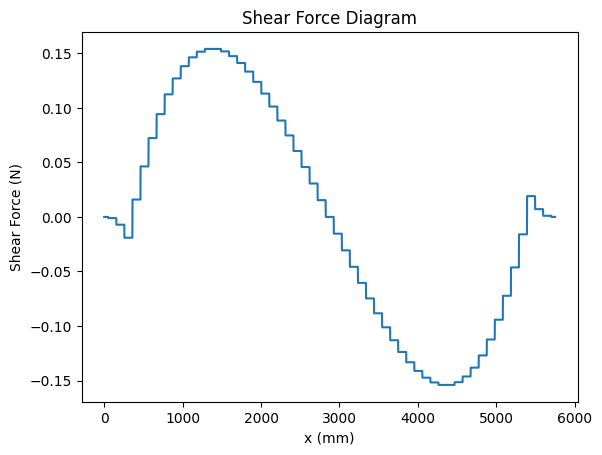

0.2475150648447981
43.65214436374624


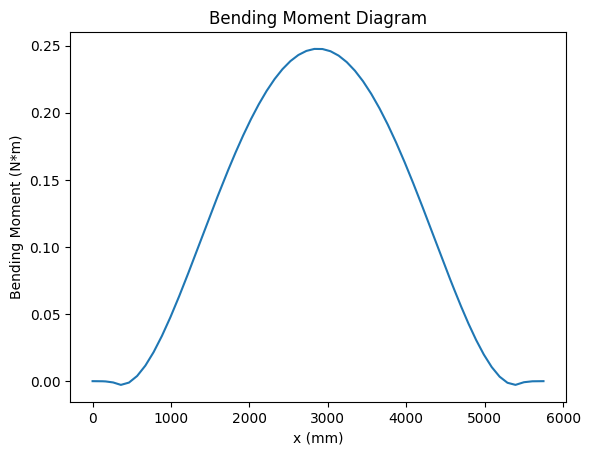

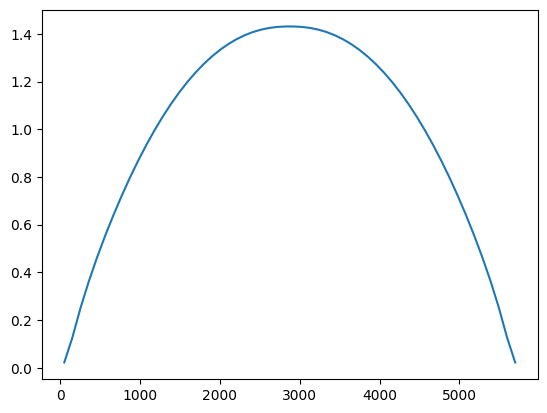

681.4223021005829


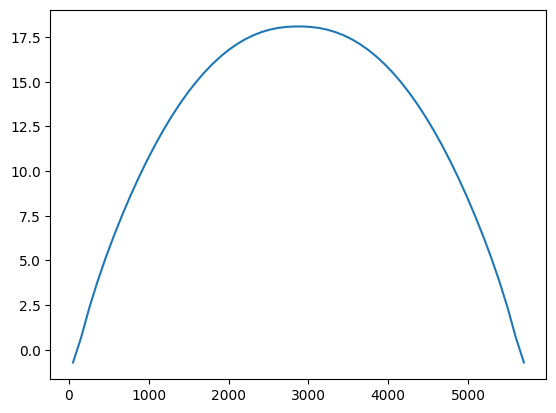

Maximum positive shear is  0.15396670425179976 N.
Maximum negative shear is  -0.15396670425179998 N.
Maximum positive moment is  0.2475150648447981 Nm.
Maximum negative moment is  -0.002799675227562513 Nm.
Moment at the end is  1.205278756031929e-17 Nm.


In [158]:
# POSITIVE ACCEL

difference = water_weight - total_weight
vol_mass = []

# Looping for the number of saved values for the outer hull volume array (list)
# Calculate the mass for each iteration stored value in the array
# Store each of these mass values in a separate array (list) called "vol_mass"
for i in range(0,len(vol_out)):
    mass = (vol_out[i]/10**9)*water_den - difference/len(vol_out)
    vol_mass.append(mass)
    
# Plot SFD and BMD
pad_weight = [pad1, pad2, pad3, pad4, pad5, pad6]

# Length is equal to the X-coordinate of the station with the largest X-coordinate. Obtained from previous sections of code
length = max(x_out)
pad_po = [pad1_po, pad2_po, pad3_po, pad4_po, pad5_po, pad6_po]

# Make an array containing the middle x-coordinate of each station
stat_x = []
for i in range(0,len(station)-1):
    stat_x.append((station[i]+station[i+1])/2)

# Calculate the shear force
g = 9.81
x = []
shear = []

# Acceleration from transport
a = 0.0472
accelForce = a*canoe_weight
distribLoad = accelForce/50 # no. stations on which the upwards distributed load is applied

# Loop through the length of the canoe
for i in range(0,int(length),1):
    
    # Append (add to the end of a list) the current distance travelled along the length of the canoe onto x
    x.append(i)

    # Calculate the shear force for this station
    shear_force = 0


    # Loop through each station
    for j in range(0,len(stat_x),1):
        # For each station we have moved past along the length of the canoe, sum up their impact on the shear force
        if i >= stat_x[j] and stat_x[j]>=350 and stat_x[j]<=5400: # this is assuming that the distributed load is applied starting 350mm from each end
            shear_force  = shear_force + distribLoad - stat_Mass[j]*a
        elif i >= stat_x[j]:
            shear_force  = shear_force - stat_Mass[j]*a
        # Why is this else statement even here? (reluctant to remove unless it has some hidden purpose I'm missing)
        else:
            shear_force = shear_force
    
    # # Loop through each paddler (why is there no upper bound at 1 here?)
    # for k in range(0,len(pad_po)):
    #     if i >= pad_po[k]:
    #         shear_force = shear_force - pad_weight[k]*g
    #     else:
    #         shear_force = shear_force
    
    # Append the shear force summed at this length along the canoe
    shear.append(shear_force)

plt.plot(x,shear)
plt.title('Shear Force Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Shear Force (N)')
plt.show()

# Track mm distance of station for paddler positions
mm_traveled = 0
paddler_counter = 0

# Store Vf and paddlers? for csv file
Paddler_array = []
Station_by_length = []

# for i in range(1,57):

#     # Check if a paddler is in this station and calculate accordingly
#     stationHasPaddler = False
    
#     delta_mm_traveled = mm_traveled + float(canoe_info[4][i])

#     for j in range(round(mm_traveled), round(delta_mm_traveled)):
#         Station_by_length.append(i)

#     if(paddler_counter < len(pad_po)) and (mm_traveled <= pad_po[paddler_counter] and delta_mm_traveled > pad_po[paddler_counter]):
#         stationHasPaddler = True
#         paddler_counter += 1
#     mm_traveled = delta_mm_traveled

#     Paddler_array.append(stationHasPaddler)

# Export points to csv file:
# df1 = pd.DataFrame(data={'Station': Station_by_length, 'Length': x, 'Shear': shear})

# csv_file = 'Length_vs_Shear_6 Paddler.csv'
# script_dir = os.path.abspath('data')
# file_path = os.path.join(script_dir, csv_file)
# df1.to_csv(file_path, index=False)

moment = []
moment.append(0)
bending_moment = 0
for i in range(1,len(x),1):
    bending_moment = bending_moment + (x[i]-x[i-1])*shear[i]/1000
    moment.append(bending_moment)

centre_moment = moment[2875]
print(centre_moment)

enduranceLimitFactor = 0.525
centre_resistanceTensTopArray = 436.01950535944775
enduranceLimit = enduranceLimitFactor*centre_resistanceTensTopArray
momentAccelerationRatio = 5.243963238237237 # moment at centre in the current loading scheme caused by a UNIT ACCELERATION (linearity )

peakAccel = enduranceLimit/momentAccelerationRatio
print(peakAccel)

resistanceTensBottomArray = pd.read_csv('resistanceTensBottomArray.csv', header=None)[0]
resistanceTensTopArray = pd.read_csv('resistanceTensTopArray.csv', header=None)[0]

plt.plot(x,moment)
plt.title('Bending Moment Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Bending Moment (N*m)')
plt.show()

plt.plot(stat_x,stat_Mass)
plt.show()

print(sum(vol_mass))

plt.plot(stat_x,vol_mass)
plt.show()

# # Export points to csv file:
# df1 = pd.DataFrame(data={'Station': Station_by_length, 'Length': x, 'Moment': moment})

# csv_file = 'Length_vs_Moment_6 Paddler.csv'
# script_dir = os.path.abspath('data')
# file_path = os.path.join(script_dir, csv_file)
# df1.to_csv(file_path, index=False)

shear_max_index = shear.index(max(shear))
#x(shear_max_index)

print('Maximum positive shear is ', max(shear), 'N.')
print('Maximum negative shear is ', min(shear), 'N.')
print('Maximum positive moment is ', max(moment), 'Nm.')
print('Maximum negative moment is ', min(moment), 'Nm.')
print('Moment at the end is ', moment[len(moment)-1],'Nm.')

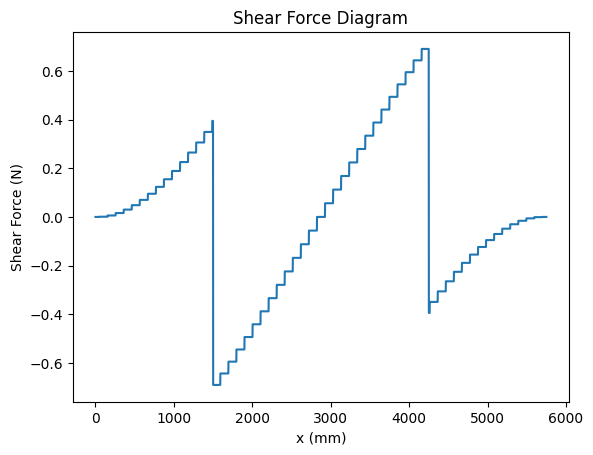

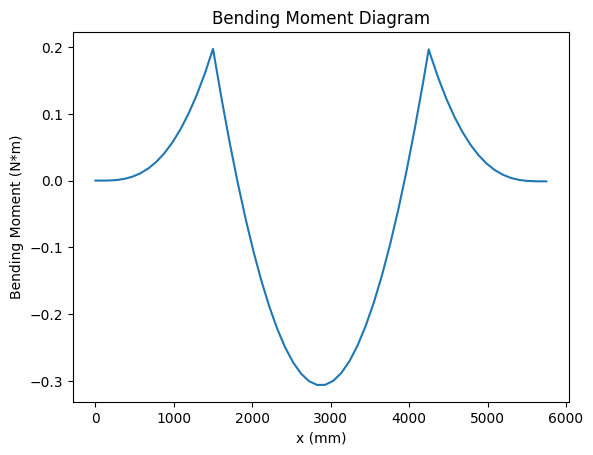

-0.3059827368286592
-27.563357835055108
Maximum positive shear is  0.6909294938308654 N.
Maximum negative shear is  -0.6909294938308681 N.
Maximum positive moment is  0.197260819442422 Nm.
Maximum negative moment is  -0.3059827368286592 Nm.
Moment at the end is  -0.0010858150170202526 Nm.


In [ ]:
# NEGATIVE ACCEL

difference = water_weight - total_weight
vol_mass = []

# Looping for the number of saved values for the outer hull volume array (list)
# Calculate the mass for each iteration stored value in the array
# Store each of these mass values in a separate array (list) called "vol_mass"
for i in range(0,len(vol_out)):
    mass = (vol_out[i]/10**9)*water_den - difference/len(vol_out)
    vol_mass.append(mass)

# ADDED TO TRANSPORT
a = 0.0393

minAccelForce = a*canoe_weight
strapForce = minAccelForce/2

# Plot SFD and BMD
pad_weight = [strapForce, strapForce]

# Length is equal to the X-coordinate of the station with the largest X-coordinate. Obtained from previous sections of code
length = max(x_out)
pad_po = [1500,4250]

# Make an array containing the middle x-coordinate of each station
stat_x = []
for i in range(0,len(station)-1):
    stat_x.append((station[i]+station[i+1])/2)

# Calculate the shear force
g = 9.81
x = []
shear = []

# Loop through the length of the canoe
for i in range(0,int(length),1):
    
    # Append (add to the end of a list) the current distance travelled along the length of the canoe onto x
    x.append(i)

    # Calculate the shear force for this station
    shear_force = 0

    # Loop through each station
    for j in range(0,len(stat_x),1):
        # For each station we have moved past along the length of the canoe, sum up their impact on the shear force
        if i >= stat_x[j]:
            shear_force  = shear_force + stat_Mass[j]*a
        
        # Why is this else statement even here? (reluctant to remove unless it has some hidden purpose I'm missing)
        else:
            shear_force = shear_force
    
    # Loop through each paddler (why is there no upper bound at 1 here?)
    for k in range(0,len(pad_po)):
        if i >= pad_po[k]:
            shear_force = shear_force - pad_weight[k]
        else:
            shear_force = shear_force
    
    # Append the shear force summed at this length along the canoe
    shear.append(shear_force)

plt.plot(x,shear)
plt.title('Shear Force Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Shear Force (N)')
plt.show()

# Track mm distance of station for paddler positions
mm_traveled = 0
paddler_counter = 0

# Store Vf and paddlers? for csv file
Paddler_array = []
Station_by_length = []

for i in range(1,57):

    # Check if a paddler is in this station and calculate accordingly
    stationHasPaddler = False
    
    delta_mm_traveled = mm_traveled + float(canoe_info[4][i])

    for j in range(round(mm_traveled), round(delta_mm_traveled)):
        Station_by_length.append(i)

    if(paddler_counter < len(pad_po)) and (mm_traveled <= pad_po[paddler_counter] and delta_mm_traveled > pad_po[paddler_counter]):
        stationHasPaddler = True
        paddler_counter += 1
    mm_traveled = delta_mm_traveled

    Paddler_array.append(stationHasPaddler)

# Export points to csv file:
df1 = pd.DataFrame(data={'Station': Station_by_length, 'Length': x, 'Shear': shear})

csv_file = 'Length_vs_Shear_6 Paddler.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
#df1.to_csv(file_path, index=False)

moment = []
moment.append(0)
bending_moment = 0
for i in range(1,len(x),1):
    bending_moment = bending_moment + (x[i]-x[i-1])*shear[i]/1000
    moment.append(bending_moment)

plt.plot(x,moment)
plt.title('Bending Moment Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Bending Moment (N*m)')
plt.show()

# Export points to csv file:
df1 = pd.DataFrame(data={'Station': Station_by_length, 'Length': x, 'Moment': moment})

csv_file = 'Length_vs_Moment_6 Paddler.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
#df1.to_csv(file_path, index=False)

shear_max_index = shear.index(max(shear))
#x(shear_max_index)

centre_moment = moment[2875]
print(centre_moment)

enduranceLimitFactor = 0.525
centre_resistanceTensBottomArray = -408.7682862744822
enduranceLimit = enduranceLimitFactor*centre_resistanceTensBottomArray
momentAccelerationRatio = 7.785820275538795

peakAccel = enduranceLimit/momentAccelerationRatio
print(peakAccel)

print('Maximum positive shear is ', max(shear), 'N.')
print('Maximum negative shear is ', min(shear), 'N.')
print('Maximum positive moment is ', max(moment), 'Nm.')
print('Maximum negative moment is ', min(moment), 'Nm.')
print('Moment at the end is ', moment[len(moment)-1],'Nm.')

In [ ]:
# export the values to csv file
# READ ME: This code has nothing to do with calculations, it only saves values and can be ignored from a calculation standpoint.
titles = ['Positive Shear [N]', 'Negative Shear [N]', 'Positive Bending Moment [Nm]', 'Negative Bending Moment [Nm]', 'Moment at the end [Nm]']
values = [max(shear), min(shear), max(moment), min(moment), moment[len(moment)-1]]
station_no = []
max_width = []
max_depth = []
station_t = [] # Station thickness

for value in [max(shear), min(shear)]:
    shear_index = shear.index(value)
    xshear = x[shear_index]
    for i in range(0,len(station)-1,1):
        if (xshear >= station[i] and xshear < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))

for value in [max(moment), min(moment)]:
    moment_index = moment.index(value)
    xmoment = x[moment_index]
    for i in range(0,len(station)-1,1):
        if (xmoment >= station[i] and xmoment < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))
    
station_no.append(len(station)-1)  
max_width.append('')
max_depth.append('')
station_t.append('')

df1 = pd.DataFrame(data={'': titles, 'Value': values, 'Station No': station_no, 'Max Width [mm]': max_width, 'Max Depth [mm]': max_depth, 'Station Thickness [mm]': station_t})

csv_file = 'Shear_and_Moment_6 Paddlers.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
#df1.to_csv(file_path, index=False)

In [ ]:
# Make a CSV file for buoyancy and gravity
# vol_mass (Array of force_buoyancy by station)
# stat_mass (Array of force_gravity by station)
df1 = pd.DataFrame(data={'Station No.': range(1, len(vol_mass) + 1, 1), 'Buoyancy Force [N]': [i * g for i in vol_mass], 'Self Weight': [i * g for i in stat_Mass] })

#csv_file = 'Station_Loads_6 Paddlers.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
#df1.to_csv(file_path, index=False)
print("Complete !")

Complete !


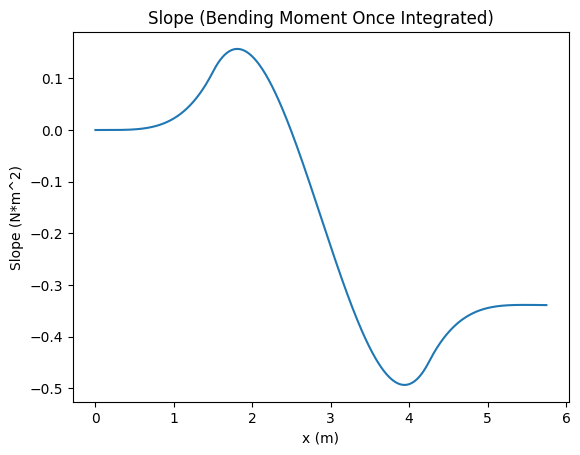

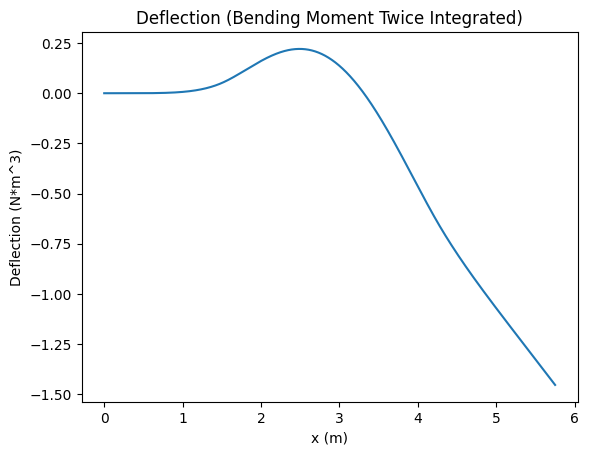

In [162]:
# Deflection for now <?>

# Convert x to m
x = [i / 1000 for i in x]

# Integrate a matplotlib graph
# xList and yList are from matplotlib graph
# C is the integration constant
def integrate(yList, xList, C):
    # The function starts at C
    output = [C]
    for i in range(len(xList) - 1):
        riemannHeight = yList[i+1] + yList[i] / 2
        riemannWidth = xList[i+1] - xList[i]
        output.append(output[i] + (riemannHeight * riemannWidth))
    return output


# Integrate to find slope
slope = integrate(moment, x, 0)

# Plot slope
plt.plot(x,slope)
plt.title("Slope (Bending Moment Once Integrated)")
plt.xlabel('x (m)')
plt.ylabel('Slope (N*m^2)')
plt.show()

# Integrate to find deflection
deflection = integrate(slope, x, 0)

# Plot Deflection
plt.plot(x,deflection)
plt.title("Deflection (Bending Moment Twice Integrated)")
plt.xlabel('x (m)')
plt.ylabel('Deflection (N*m^3)')
plt.show()
